In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[(df2['team1'] == 'Mumbai Indians') & ((df2['team2'] == 'Delhi Daredevils') | (df2['team2'] == 'Delhi Capitals'))]
match2 = df2[((df2['team1'] == 'Delhi Daredevils') | (df2['team1'] == 'Delhi Capitals')) & (df2['team2'] == 'Mumbai Indians')]

Match1 = Mumbai Home Ground

Match2 = Delhi Home Ground

# Overall Delhi vs Mumbai:

In [5]:
match = pd.concat((match1,match2))
match.head()

id  season         city        date           team1             team2  \
23    24    2017       Mumbai  2017-04-22  Mumbai Indians  Delhi Daredevils   
43    44    2017        Delhi  2017-05-06  Mumbai Indians  Delhi Daredevils   
81    82    2008       Mumbai  2008-05-04  Mumbai Indians  Delhi Daredevils   
108  109    2008        Delhi  2008-05-24  Mumbai Indians  Delhi Daredevils   
149  150    2009  East London  2009-05-08  Mumbai Indians  Delhi Daredevils   

          toss_winner toss_decision  result  dl_applied            winner  \
23   Delhi Daredevils         field  normal           0    Mumbai Indians   
43   Delhi Daredevils         field  normal           0    Mumbai Indians   
81   Delhi Daredevils         field  normal           0    Mumbai Indians   
108  Delhi Daredevils         field  normal           0  Delhi Daredevils   
149    Mumbai Indians           bat  normal           0  Delhi Daredevils   

     win_by_runs  win_by_wickets player_of_match                       venue  \
23            14               0  MJ McClenaghan            Wankhede Stadium   
43           146               0     LMP Simmons            Feroz Shah Kotla   
81            29               0      SM Pollock  Dr DY Patil Sports Academy   
108            0               5      KD Karthik            Feroz Shah Kotla   
149            0               7         A Nehra                Buffalo Park   

            umpire1      umpire2 umpire3  
23   A Nand Kishore       S Ravi     NaN  
43      Nitin Menon    CK Nandan     NaN  
81        IL Howell  RE Koertzen     NaN  
108       BF Bowden  K Hariharan     NaN  
149       M Erasmus  SK Tarapore     NaN

Matches played between Mumbai and Delhi.

In [6]:
match.shape

(24, 18)

In [7]:
match['winner'].value_counts()

Mumbai Indians      12
Delhi Daredevils    11
Delhi Capitals       1
Name: winner, dtype: int64

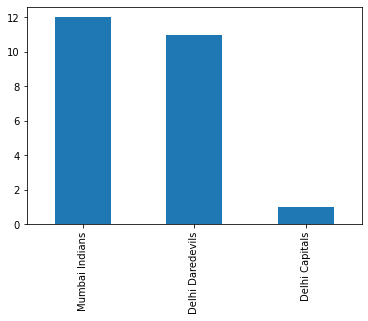

In [8]:
match['winner'].value_counts().plot.bar()
plt.show()

Mumbai and Delhi both won 12 times against each other.

In [9]:
match['toss_winner'].value_counts()

Delhi Daredevils    14
Mumbai Indians      10
Name: toss_winner, dtype: int64

In [10]:
match['toss_decision'].value_counts()

field    15
bat       9
Name: toss_decision, dtype: int64

In [11]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Delhi Daredevils    5
Mumbai Indians      3
Name: winner, dtype: int64

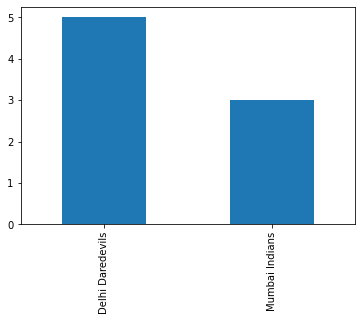

In [12]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Delhi won the toss and won the match 5 times whereas Mumbai won 3 times. So winning toss doesn't have much affect to winning the match.

In [13]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning    batting_team      bowling_team  over  ball  \
5512        24       1  Mumbai Indians  Delhi Daredevils     1     1   
5513        24       1  Mumbai Indians  Delhi Daredevils     1     2   
5514        24       1  Mumbai Indians  Delhi Daredevils     1     3   
5515        24       1  Mumbai Indians  Delhi Daredevils     1     4   
5516        24       1  Mumbai Indians  Delhi Daredevils     1     5   

         batsman non_striker    bowler  is_super_over  ...  bye_runs  \
5512    PA Patel  JC Buttler  K Rabada              0  ...         0   
5513  JC Buttler    PA Patel  K Rabada              0  ...         0   
5514  JC Buttler    PA Patel  K Rabada              0  ...         0   
5515    PA Patel  JC Buttler  K Rabada              0  ...         0   
5516  JC Buttler    PA Patel  K Rabada              0  ...         0   

      legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
5512            1            0             0             0           1   
5513            0            0             0             0           5   
5514            0            0             0             1           0   
5515            0            0             0             1           0   
5516            0            0             0             0           0   

      total_runs  player_dismissed dismissal_kind fielder  
5512           1               NaN            NaN     NaN  
5513           5               NaN            NaN     NaN  
5514           1               NaN            NaN     NaN  
5515           1               NaN            NaN     NaN  
5516           0               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Mumbai and Delhi.

In [14]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## How many wickets will fall in totall during the powerplay:

In [15]:
total_wickets_fallen = delivery[delivery['over']<=6]['player_dismissed'].count()
total_wickets_fallen

75

Total 75 wickets fallen in Delhi vs Mumbai match during the powerplay till now.

In [16]:
avg_wicket_fallen = np.round(total_wickets_fallen/len(ids))
avg_wicket_fallen

3.0

3 wickets in an average fallen during powerplay in Delhi vs Mumbai match during powerplay till now.

In [17]:
total_matches_Delhi_batting_first_Mumbai_batting_second = list(delivery[(delivery['inning'] == 1) & (delivery['batting_team'] != 'Mumbai Indians')]['match_id'].unique())
len(total_matches_Delhi_batting_first_Mumbai_batting_second)

7

Delhi batted in first innings in 7 matches against Mumbai.

In [18]:
total_wickets_fallen_Delhi_batting_first_Mumbai_batting_second = 0
for i in total_matches_Delhi_batting_first_Mumbai_batting_second:
    total_wickets_fallen_Delhi_batting_first_Mumbai_batting_second += delivery[(delivery['match_id'] == i) & (delivery['over']<=6)]['player_dismissed'].count()
total_wickets_fallen_Delhi_batting_first_Mumbai_batting_second

26

Total 26 wickets fallen during powerplay when Delhi batted in first inning and Mumbai batted in second inning.

In [19]:
avg_wickets_fallen_Delhi_batting_first_Mumbai_batting_second = np.round(total_wickets_fallen_Delhi_batting_first_Mumbai_batting_second/len(total_matches_Delhi_batting_first_Mumbai_batting_second))
avg_wickets_fallen_Delhi_batting_first_Mumbai_batting_second

4.0

4 wickets in an average fallen per match during powerplay when Delhi batted in first inning and Mumbai batted in second inning.

In [20]:
total_matches_Mumbai_batting_first_Delhi_batting_second = list(delivery[(delivery['inning'] == 1) & (delivery['batting_team'] == 'Mumbai Indians')]['match_id'].unique())
len(total_matches_Mumbai_batting_first_Delhi_batting_second)

17

Mumbai batted in first innings in 17 matches against Delhi.

In [21]:
total_wickets_fallen_Mumbai_batting_first_Delhi_batting_second = 0
for i in total_matches_Mumbai_batting_first_Delhi_batting_second:
    total_wickets_fallen_Mumbai_batting_first_Delhi_batting_second += delivery[(delivery['match_id'] == i) & (delivery['over']<=6)]['player_dismissed'].count()
total_wickets_fallen_Mumbai_batting_first_Delhi_batting_second

49

Total 49 wickets fallen during powerplay when Mumbai batted in first inning and Delhi batted in second inning.

In [22]:
avg_wickets_fallen_Mumbai_batting_first_Delhi_batting_second = np.round(total_wickets_fallen_Mumbai_batting_first_Delhi_batting_second/len(total_matches_Mumbai_batting_first_Delhi_batting_second))
avg_wickets_fallen_Mumbai_batting_first_Delhi_batting_second

3.0

3 wickets in an average fallen during powerplay per match when Mumbai batted in first inning and Delhi batted in second inning.

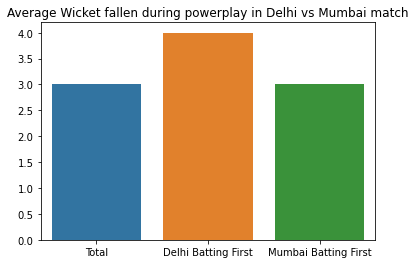

In [23]:
avg_wickets_per_match = pd.Series([avg_wicket_fallen,avg_wickets_fallen_Delhi_batting_first_Mumbai_batting_second,avg_wickets_fallen_Mumbai_batting_first_Delhi_batting_second],index=['Total','Delhi Batting First','Mumbai Batting First'])
sns.barplot(x=avg_wickets_per_match.index,y=avg_wickets_per_match)
plt.title('Average Wicket fallen during powerplay in Delhi vs Mumbai match')
plt.show()

So 3-4 wickets fallen during powerplay in Delhi vs Mumbai match till now.

## How many bowlers will have an economy rate less than 9 and give fewer than 6 boundaries of which atmost 2 of them only are 6s:

In [24]:
economy_dict = {}
for j in ids:
    bowlers = list(delivery[delivery['match_id'] == j]['bowler'].unique())
    counter = 0
    for k in bowlers:
        runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == k)]['total_runs'])
        batsman_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == k)]['batsman_runs'])
        bye_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == k)]['bye_runs'])
        legbye_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == k)]['legbye_runs'])
        wide_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == k)]['wide_runs'])
        noball_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == k)]['noball_runs'])
        s = 0
        bye = 0
        legbye = 0
        noball = 0
        wideball = 0
        boundary_count = 0
        economy_rate = 999
        for i in range(0,len(runs)):
            if batsman_runs[i] >=6 :
                boundary_count += 1
            s += runs[i]
            bye += bye_runs[i]
            legbye += legbye_runs[i]
            if noball_runs[i] > 0:
                noball += 1
            if wide_runs[i] > 0:
                wideball += 1
        total_balls = len(runs) - noball - wideball
        total_runs = s - bye - legbye
        if total_balls > 6:
            economy_rate = (total_runs/total_balls)*6
        else:
            economy_rate = 999
        if economy_rate < 9 and boundary_count <= 2:
            counter += 1
    economy_dict[j] = counter
economy_dict

{24: 9,
 44: 6,
 82: 8,
 109: 6,
 150: 9,
 170: 5,
 183: 4,
 221: 7,
 282: 7,
 327: 9,
 390: 5,
 408: 5,
 473: 9,
 508: 7,
 623: 6,
 7902: 4,
 11325: 8,
 238: 11,
 342: 3,
 539: 8,
 556: 8,
 593: 9,
 7948: 5,
 11139: 3}

These are the number of bowlers match wise who had economy rate less than 9, gave away at most 2 6s and bowled more than 1 over in Delhi vs Mumbai match.

In [25]:
np.mean(list(economy_dict.values()))

6.708333333333333

**So ~7 bowlers in an average satisfied the conditions given per match.**

In [26]:
bowlers = ['JJ Bumrah', 'MJ McClenaghan', 'HH Pandya', 'KH Pandya', 'DS Kulkarni', 'KA Pollard', 'RD Chahar', 'K Rabada', 'S Lamichhane', 'HV Patel', 'AR Patel']
economy_dict = {}
for j in bowlers:
    counter = 0
    for k in ids:
        runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['total_runs'])
        batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['batsman_runs'])
        bye_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['bye_runs'])
        legbye_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['legbye_runs'])
        wide_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['wide_runs'])
        noball_runs = list(delivery[(delivery['match_id'] == k) & (delivery['bowler'] == j)]['noball_runs'])
        s = 0
        bye = 0
        legbye = 0
        noball = 0
        wideball = 0
        boundary_count = 0
        economy_rate = 999
        for i in range(0,len(runs)):
            if batsman_runs[i] >=6 :
                boundary_count += 1
            s += runs[i]
            bye += bye_runs[i]
            legbye += legbye_runs[i]
            if noball_runs[i] > 0:
                noball += 1
            if wide_runs[i] > 0:
                wideball += 1
        total_balls = len(runs) - noball - wideball
        total_runs = s - bye - legbye
        if total_balls > 6:
            economy_rate = (total_runs/total_balls)*6
        else:
            economy_rate = 999
        if economy_rate < 9 and boundary_count <= 2:
            counter += 1
    economy_dict[j] = counter
economy_dict

{'JJ Bumrah': 5,
 'MJ McClenaghan': 3,
 'HH Pandya': 4,
 'KH Pandya': 5,
 'DS Kulkarni': 4,
 'KA Pollard': 4,
 'RD Chahar': 1,
 'K Rabada': 3,
 'S Lamichhane': 0,
 'HV Patel': 0,
 'AR Patel': 1}

These are the current Mumbai and Delhi bowlers who had economy rate less than 9 and gave away at most 2 6s these many times in Mumbai vs Delhi match till now.

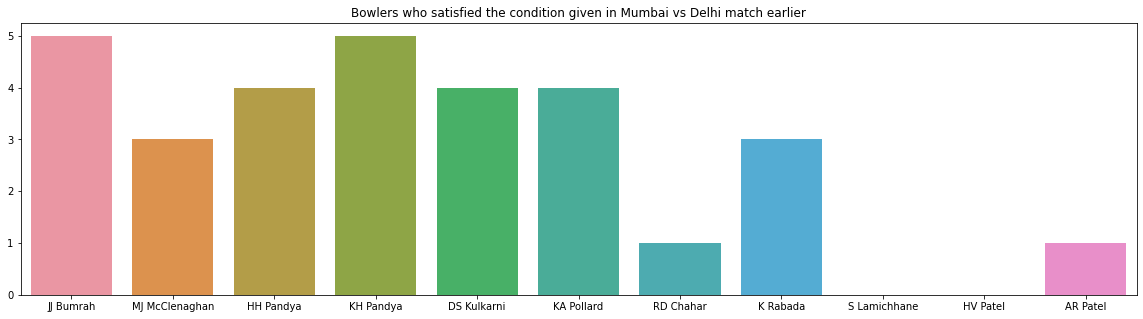

In [27]:
economy_rate = pd.Series(list(economy_dict.values()),index = list(economy_dict.keys()))
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x = economy_rate.index, y = economy_rate,ax=ax)
plt.title('Bowlers who satisfied the condition given in Mumbai vs Delhi match earlier')
plt.show()

**Bumrah and Krunal Pandya had economy rate less than 9 and gave away at most 2 6s 5 times which is highest followed by Hardik Pandya and Dhawal Kulkarni among current Mumbai and Delhi bowlers in Mumbai vs Delhi match earlier.**

In [28]:
bowlers_overall = ['HV Patel', 'S Lamichhane', 'K Rabada', 'AR Patel', 'K Paul', 'MP Stoinis', 'Avesh Khan', 'R Ashwin', 'JJ Bumrah', 'MJ McClenaghan', 'HH Pandya', 'KH Pandya', 'DS Kulkarni', 'KA Pollard', 'RD Chahar', 'J Yadav', 'NM Coulter-Nile', 'TA Boult']
total_ids = list(df1[df1['bowler'].isin(bowlers_overall)]['match_id'].unique())
economy_dict_overall = {}
for j in bowlers_overall:
    counter = 0
    for k in total_ids:
        runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['total_runs'])
        batsman_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['batsman_runs'])
        bye_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['bye_runs'])
        legbye_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['legbye_runs'])
        wide_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['wide_runs'])
        noball_runs = list(df1[(df1['match_id'] == k) & (df1['bowler'] == j)]['noball_runs'])
        s = 0
        bye = 0
        legbye = 0
        noball = 0
        wideball = 0
        boundary_count = 0
        economy_rate = 999
        for i in range(0,len(runs)):
            if batsman_runs[i] >=6 :
                boundary_count += 1
            s += runs[i]
            bye += bye_runs[i]
            legbye += legbye_runs[i]
            if noball_runs[i] > 0:
                noball += 1
            if wide_runs[i] > 0:
                wideball += 1
        total_balls = len(runs) - noball - wideball
        total_runs = s - bye - legbye
        if total_balls > 6:
            economy_rate = (total_runs/total_balls)*6
        else:
            economy_rate = 999
        if economy_rate < 9 and boundary_count <= 2:
            counter += 1
    economy_dict_overall[j] = counter
economy_dict_overall

{'HV Patel': 21,
 'S Lamichhane': 5,
 'K Rabada': 11,
 'AR Patel': 58,
 'K Paul': 4,
 'MP Stoinis': 7,
 'Avesh Khan': 3,
 'R Ashwin': 105,
 'JJ Bumrah': 57,
 'MJ McClenaghan': 28,
 'HH Pandya': 20,
 'KH Pandya': 36,
 'DS Kulkarni': 46,
 'KA Pollard': 27,
 'RD Chahar': 12,
 'J Yadav': 9,
 'NM Coulter-Nile': 19,
 'TA Boult': 16}

These are the current Mumbai and Delhi bowlers who had economy rate less than 9 and gave away at most 2 6s these many times in overall IPL till now.

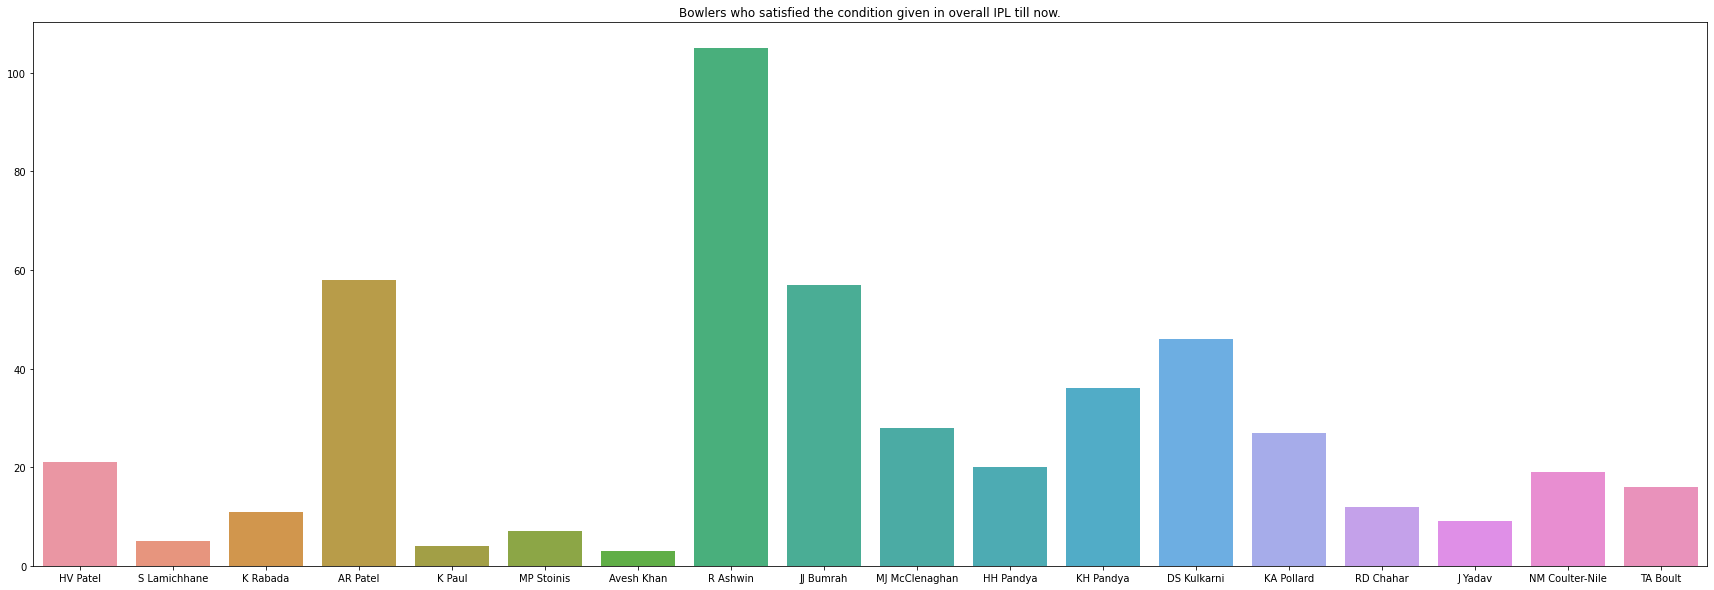

In [29]:
economy_rate_overall = pd.Series(list(economy_dict_overall.values()),index = list(economy_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(x = economy_rate_overall.index, y = economy_rate_overall,ax=ax)
plt.title('Bowlers who satisfied the condition given in overall IPL till now.')
plt.show()

## How many batsmen in the match will score more than 30 runs:

In [30]:
runs_dict = {}
for j in ids:
    batsman = list(delivery[delivery['match_id'] == j]['batsman'].unique())
    counter = 0
    for k in batsman:
        batsman_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == k)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        if total_run > 30:
            counter += 1
    runs_dict[j] = counter
runs_dict

{24: 2,
 44: 2,
 82: 3,
 109: 4,
 150: 2,
 170: 4,
 183: 3,
 221: 4,
 282: 5,
 327: 2,
 390: 4,
 408: 4,
 473: 2,
 508: 5,
 623: 4,
 7902: 5,
 11325: 5,
 238: 1,
 342: 5,
 539: 2,
 556: 3,
 593: 4,
 7948: 4,
 11139: 5}

These are the number of batsmen match wise who scored more than 30 runs in Mumbai vs Delhi match till now.

In [31]:
np.mean(list(runs_dict.values()))

3.5

**So ~4 batsmen in an average scored more than 30 runs in Mumbai vs Delhi match till now.**

In [32]:
batsman = ['RR Pant', 'SS Iyer', 'S Dhawan', 'P Shaw', 'AR Patel', 'RG Sharma', 'KA Pollard', 'KH Pandya', 'HH Pandya', 'Ishan Kishan', 'Q de Kock']
runs_dict = {}
for j in batsman:
    counter = 0
    for k in ids:
        batsman_runs = list(delivery[(delivery['match_id'] == k) & (delivery['batsman'] == j)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        if total_run > 30:
            counter += 1
    runs_dict[j] = counter
runs_dict

{'RR Pant': 3,
 'SS Iyer': 1,
 'S Dhawan': 2,
 'P Shaw': 0,
 'AR Patel': 0,
 'RG Sharma': 7,
 'KA Pollard': 3,
 'KH Pandya': 4,
 'HH Pandya': 1,
 'Ishan Kishan': 1,
 'Q de Kock': 2}

These are the current Delhi and Mumbai batsmen who scored more than 30 runs these many times in Mumbai vs Delhi match till now.

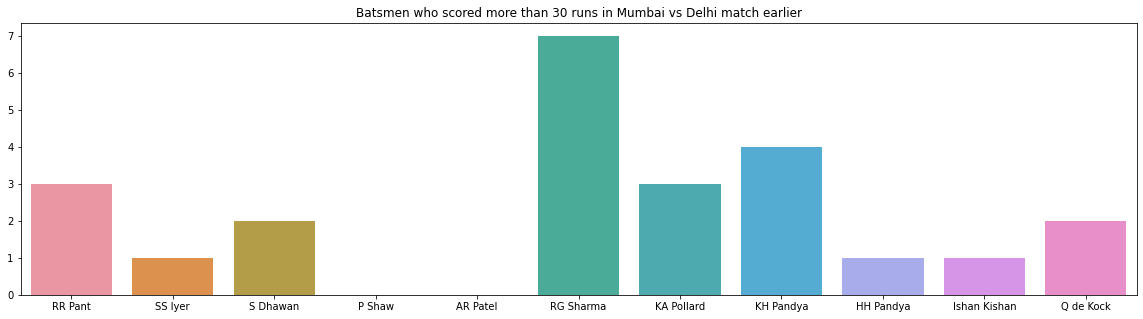

In [33]:
runs = pd.Series(list(runs_dict.values()),index = list(runs_dict.keys()))
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x = runs.index, y = runs,ax=ax)
plt.title('Batsmen who scored more than 30 runs in Mumbai vs Delhi match earlier')
plt.show()

**Rohit Sharma scored more than 30 runs most of the times in Mumbai vs Delhi match followed by Krunal Pandya.**

In [50]:
batsman_overall = ['RR Pant', 'SS Iyer', 'S Dhawan', 'P Shaw', 'AR Patel', 'AM Rahane', 'S Hetmyer', 'MP Stoinis', 'RG Sharma', 'KA Pollard', 'KH Pandya', 'HH Pandya', 'Ishan Kishan', 'Q de Kock', 'SS Tiwary', 'SA Yadav']
runs_dict_overall = {}
total_ids = list(df1[df1['batsman'].isin(batsman_overall)]['match_id'].unique())
for j in batsman_overall:
    counter = 0
    for k in total_ids:
        batsman_runs = list(df1[(df1['match_id'] == k) & (df1['batsman'] == j)]['batsman_runs'])
        total_run = np.sum(batsman_runs)
        if total_run > 30:
            counter += 1
    runs_dict_overall[j] = counter
runs_dict_overall

{'RR Pant': 26,
 'SS Iyer': 25,
 'S Dhawan': 62,
 'P Shaw': 7,
 'AR Patel': 7,
 'AM Rahane': 52,
 'S Hetmyer': 1,
 'MP Stoinis': 6,
 'RG Sharma': 64,
 'KA Pollard': 30,
 'KH Pandya': 13,
 'HH Pandya': 10,
 'Ishan Kishan': 10,
 'Q de Kock': 20,
 'SS Tiwary': 14,
 'SA Yadav': 5}

These are the current Delhi and Mumbai batsmen who scored more than 30 runs these many times in overall IPL till now.

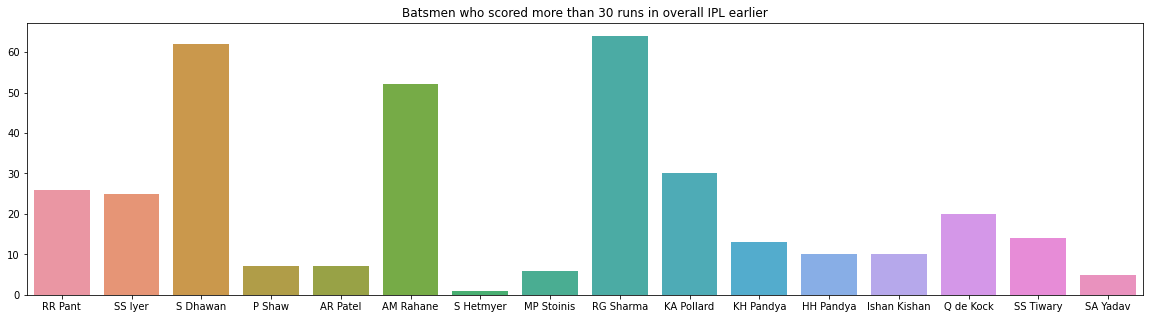

In [51]:
runs_overall = pd.Series(list(runs_dict_overall.values()),index = list(runs_dict_overall.keys()))
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x = runs_overall.index, y = runs_overall,ax=ax)
plt.title('Batsmen who scored more than 30 runs in overall IPL earlier')
plt.show()

## What will be Jasprit Bumrah's Economy Rate in the Death:

In [52]:
economy_rate_list = []
for j in ids:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'JJ Bumrah') & (delivery['over']>=16)]['total_runs'])
    bye_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'JJ Bumrah') & (delivery['over']>=16)]['bye_runs'])
    legbye_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'JJ Bumrah') & (delivery['over']>=16)]['legbye_runs'])
    wide_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'JJ Bumrah') & (delivery['over']>=16)]['wide_runs'])
    noball_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'JJ Bumrah') & (delivery['over']>=16)]['noball_runs'])
    s = 0
    bye = 0
    legbye = 0
    noball = 0
    wideball = 0
    for i in range(0,len(runs)):
        s += runs[i]
        bye += bye_runs[i]
        legbye += legbye_runs[i]
        if noball_runs[i] > 0:
            noball += 1
        if wide_runs[i] > 0:
            wideball += 1
    total_balls = len(runs) - noball - wideball
    total_runs = s - bye - legbye
    if total_balls > 0:
        economy_rate = (total_runs/total_balls)*6
    else:
        economy_rate = 0
    if economy_rate > 0:
        economy_rate_list.append(economy_rate)
print(economy_rate_list)

[4.5, 13.0, 10.0, 2.5, 8.0, 6.0, 12.5, 11.666666666666666, 10.0, 15.5]


These are the economy rates of Bumrah against Delhi till now.

In [53]:
avg_economy_rate = np.mean(economy_rate_list)
avg_economy_rate

9.366666666666665

Jasprit Bumrah's average economy rate is 9.36 per match against Delhi.

In [38]:
economy_rate_list_bowling_first = []
for j in ids:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'JJ Bumrah') & (delivery['inning'] == 1) & (delivery['over']>=16)]['total_runs'])
    bye_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'JJ Bumrah') & (delivery['inning'] == 1) & (delivery['over']>=16)]['bye_runs'])
    legbye_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'JJ Bumrah') & (delivery['inning'] == 1) & (delivery['over']>=16)]['legbye_runs'])
    wide_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'JJ Bumrah') & (delivery['inning'] == 1) & (delivery['over']>=16)]['wide_runs'])
    noball_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'JJ Bumrah') & (delivery['inning'] == 1) & (delivery['over']>=16)]['noball_runs'])
    s = 0
    bye = 0
    legbye = 0
    noball = 0
    wideball = 0
    for i in range(0,len(runs)):
        s += runs[i]
        bye += bye_runs[i]
        legbye += legbye_runs[i]
        if noball_runs[i] > 0:
            noball += 1
        if wide_runs[i] > 0:
            wideball += 1
    total_balls = len(runs) - noball - wideball
    total_runs = s - bye - legbye
    if total_balls > 0:
        economy_rate = (total_runs/total_balls)*6
    else:
        economy_rate = 0
    if economy_rate > 0:
        economy_rate_list_bowling_first.append(economy_rate)
print(economy_rate_list_bowling_first)

[13.75, 10.5, 8.0, 10.25]


These are the economy rates of Bumrah against Delhi till now while bowling first.

In [39]:
avg_economy_rate_bowling_first = np.mean(economy_rate_list_bowling_first)
avg_economy_rate_bowling_first

10.625

Jasprit Bumrah's average economy rate is 10.625 per match against Delhi while bowling first.

In [40]:
economy_rate_list_bowling_second = []
for j in ids:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'JJ Bumrah') & (delivery['inning'] == 2) & (delivery['over']>=16)]['total_runs'])
    bye_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'JJ Bumrah') & (delivery['inning'] == 2) & (delivery['over']>=16)]['bye_runs'])
    legbye_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'JJ Bumrah') & (delivery['inning'] == 2) & (delivery['over']>=16)]['legbye_runs'])
    wide_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'JJ Bumrah') & (delivery['inning'] == 2) & (delivery['over']>=16)]['wide_runs'])
    noball_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'JJ Bumrah') & (delivery['inning'] == 2) & (delivery['over']>=16)]['noball_runs'])
    s = 0
    bye = 0
    legbye = 0
    noball = 0
    wideball = 0
    for i in range(0,len(runs)):
        s += runs[i]
        bye += bye_runs[i]
        legbye += legbye_runs[i]
        if noball_runs[i] > 0:
            noball += 1
        if wide_runs[i] > 0:
            wideball += 1
    total_balls = len(runs) - noball - wideball
    total_runs = s - bye - legbye
    if total_balls > 0:
        economy_rate = (total_runs/total_balls)*6
    else:
        economy_rate = 0
    if economy_rate > 0:
        economy_rate_list_bowling_second.append(economy_rate)
print(economy_rate_list_bowling_second)

[5.25, 6.0, 12.666666666666668, 9.0, 3.25, 6.75, 4.75]


These are the economy rates of Bumrah against Delhi till now while bowling second.

In [41]:
avg_economy_rate_bowling_second = np.mean(economy_rate_list_bowling_second)
avg_economy_rate_bowling_second

6.80952380952381

Jasprit Bumrah's average economy rate is 6.81 per match against Delhi while bowling second.

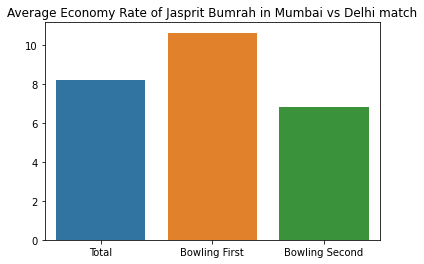

In [42]:
average_economy_rate = pd.Series([avg_economy_rate,avg_economy_rate_bowling_first,avg_economy_rate_bowling_second],index = ['Total','Bowling First','Bowling Second'])
sns.barplot(x = average_economy_rate.index , y = average_economy_rate)
plt.title('Average Economy Rate of Jasprit Bumrah in Mumbai vs Delhi match')
plt.show()

**Jasprit Bumrah's average economy rate is higher while bowling first than bowling second in Mumbai vs Delhi match.**

In [43]:
economy_rate_list_overall = []
total_ids = list(df1[df1['bowler'] == 'JJ Bumrah']['match_id'].unique())
for j in total_ids:
    runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'JJ Bumrah') & (df1['over']>=16)]['total_runs'])
    bye_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'JJ Bumrah') & (df1['over']>=16)]['bye_runs'])
    legbye_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'JJ Bumrah') & (df1['over']>=16)]['legbye_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'JJ Bumrah') & (df1['over']>=16)]['wide_runs'])
    noball_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'JJ Bumrah') & (df1['over']>=16)]['noball_runs'])
    s = 0
    bye = 0
    legbye = 0
    noball = 0
    wideball = 0
    for i in range(0,len(runs)):
        s += runs[i]
        bye += bye_runs[i]
        legbye += legbye_runs[i]
        if noball_runs[i] > 0:
            noball += 1
        if wide_runs[i] > 0:
            wideball += 1
    total_balls_overall = len(runs) - noball - wideball
    total_runs_overall = s - bye - legbye
    if total_balls_overall > 0:
        economy_rate_overall = (total_runs_overall/total_balls_overall)*6
    else:
        economy_rate_overall = 0
    if economy_rate_overall > 0:
        economy_rate_list_overall.append(economy_rate_overall)
print(economy_rate_list_overall)

[7.25, 9.75, 6.0, 9.75, 11.25, 7.5, 5.25, 7.25, 7.199999999999999, 8.25, 6.0, 7.199999999999999, 6.0, 8.25, 2.3333333333333335, 6.5, 8.0, 12.666666666666668, 7.0, 6.25, 5.5, 8.25, 6.0, 7.666666666666666, 7.666666666666666, 7.75, 9.0, 7.5, 10.909090909090908, 12.666666666666668, 9.75, 13.75, 13.0, 10.0, 8.0, 8.0, 6.333333333333334, 7.75, 10.5, 6.5, 8.5, 7.25, 8.75, 7.0, 6.5, 3.25, 10.5, 9.5, 8.0, 6.75, 7.5, 7.25, 6.25, 6.75, 5.5, 5.0, 10.5, 5.666666666666666, 13.0, 4.0, 8.0, 10.25, 5.5, 6.2727272727272725, 7.25, 5.333333333333333, 10.25, 6.0, 6.0, 4.75, 5.5, 4.0, 11.52, 8.769230769230768, 8.0, 8.0, 4.75]


Jasprit Bumrah's economy rate against all teams.

In [44]:
avg_economy_rate_overall = np.mean(economy_rate_list_overall)
avg_economy_rate_overall

7.710446523173796

Jasprit Bumrah's average economy rate is 7.71 per match against all the teams. So his economy rate is higher than his average against Delhi.

In [45]:
economy_rate_list_overall_bowling_first = []
total_ids = list(df1[df1['bowler'] == 'JJ Bumrah']['match_id'].unique())
for j in total_ids:
    runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'JJ Bumrah') & (df1['inning'] == 1) & (df1['over']>=16)]['total_runs'])
    bye_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'JJ Bumrah') & (df1['inning'] == 1) & (df1['over']>=16)]['bye_runs'])
    legbye_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'JJ Bumrah') & (df1['inning'] == 1) & (df1['over']>=16)]['legbye_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'JJ Bumrah') & (df1['inning'] == 1) & (df1['over']>=16)]['wide_runs'])
    noball_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'JJ Bumrah') & (df1['inning'] == 1) & (df1['over']>=16)]['noball_runs'])
    s = 0
    bye = 0
    legbye = 0
    noball = 0
    wideball = 0
    for i in range(0,len(runs)):
        s += runs[i]
        bye += bye_runs[i]
        legbye += legbye_runs[i]
        if noball_runs[i] > 0:
            noball += 1
        if wide_runs[i] > 0:
            wideball += 1
    total_balls_overall_bowling_first = len(runs) - noball - wideball
    total_runs_overall_bowling_first = s - bye - legbye
    if total_balls_overall_bowling_first > 0:
        economy_rate_overall_bowling_first = (s/total_balls_overall_bowling_first)*6
    else:
        economy_rate_overall_bowling_first = 0
    if economy_rate_overall_bowling_first > 0:
        economy_rate_list_overall_bowling_first.append(economy_rate_overall_bowling_first)
print(economy_rate_list_overall_bowling_first)

[9.75, 6.0, 10.0, 11.5, 7.75, 7.5, 8.0, 8.5, 6.25, 8.5, 2.3333333333333335, 9.0, 6.25, 6.0, 7.75, 7.5, 13.75, 13.0, 8.0, 7.75, 10.5, 8.75, 7.5, 8.75, 7.5, 6.25, 7.0, 5.5, 5.25, 8.0, 10.5, 10.5, 6.5, 12.0, 8.0, 8.0]


Jasprit Bumrah's economy rate against all teams while bowling in first inning.

In [46]:
avg_economy_rate_overall_bowling_first = np.mean(economy_rate_list_overall_bowling_first)
avg_economy_rate_overall_bowling_first

8.210648148148149

Jasprit Bumrah's average economy rate is 8.21 per match against all the teams while bowling in first inning.

In [47]:
economy_rate_list_overall_bowling_second = []
total_ids = list(df1[df1['bowler'] == 'JJ Bumrah']['match_id'].unique())
for j in total_ids:
    runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'JJ Bumrah') & (df1['inning'] == 2) & (df1['over']>=16)]['total_runs'])
    bye_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'JJ Bumrah') & (df1['inning'] == 2) & (df1['over']>=16)]['bye_runs'])
    legbye_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'JJ Bumrah') & (df1['inning'] == 2) & (df1['over']>=16)]['legbye_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'JJ Bumrah') & (df1['inning'] == 2) & (df1['over']>=16)]['wide_runs'])
    noball_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'JJ Bumrah') & (df1['inning'] == 2) & (df1['over']>=16)]['noball_runs'])
    s = 0
    bye = 0
    legbye = 0
    noball = 0
    wideball = 0
    for i in range(0,len(runs)):
        s += runs[i]
        bye += bye_runs[i]
        legbye += legbye_runs[i]
        if noball_runs[i] > 0:
            noball += 1
        if wide_runs[i] > 0:
            wideball += 1
    total_balls_overall_bowling_second = len(runs) - noball - wideball
    total_runs_overall_bowling_second = s - bye - legbye
    if total_balls_overall_bowling_second > 0:
        economy_rate_overall_bowling_second = (s/total_balls_overall_bowling_second)*6
    else:
        economy_rate_overall_bowling_second = 0
    if economy_rate_overall_bowling_second > 0:
        economy_rate_list_overall_bowling_second.append(economy_rate_overall_bowling_second)
print(economy_rate_list_overall_bowling_second)

[7.25, 5.25, 6.0, 7.199999999999999, 6.75, 12.666666666666668, 7.0, 5.75, 8.75, 8.0, 7.666666666666666, 9.5, 10.909090909090908, 12.666666666666668, 9.75, 10.0, 8.0, 6.333333333333334, 6.75, 7.0, 3.5, 10.5, 9.5, 8.0, 6.75, 7.75, 7.25, 12.5, 5.666666666666666, 13.0, 4.0, 5.75, 6.2727272727272725, 7.5, 5.333333333333333, 6.25, 5.0, 5.75, 4.333333333333333, 7.75, 6.0]


Jasprit Bumrah's economy rate against all teams while bowling in second inning.

In [48]:
avg_economy_rate_overall_bowling_second = np.mean(economy_rate_list_overall_bowling_second)
avg_economy_rate_overall_bowling_second

7.598743532889874

Jasprit Bumrah's average economy rate is 7.60 per match against all the teams while bowling in second inning.

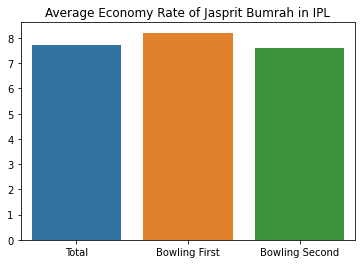

In [49]:
average_economy_rate_overall = pd.Series([avg_economy_rate_overall,avg_economy_rate_overall_bowling_first,avg_economy_rate_overall_bowling_second],index = ['Total','Bowling First','Bowling Second'])
sns.barplot(x = average_economy_rate_overall.index , y = average_economy_rate_overall)
plt.title('Average Economy Rate of Jasprit Bumrah in IPL')
plt.show()

**Jasprit Bumrah's average economy rate is higher while bowling first than bowling second in IPL.**